<a href="https://colab.research.google.com/github/SukanyaPathak2904/Heartdisease/blob/main/heart_problem_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heardisease/heart.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000




*   Age: age of the patient [years]
*  Sex: sex of the patient [M: Male, F: Female]

*   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
*  RestingBP: resting blood pressure [mm Hg]


*   Cholesterol: serum cholesterol [mm/dl]

*   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

*   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

*  MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
*  ExerciseAngina: exercise-induced angina [Y: Yes, N: No]


*   Oldpeak: oldpeak = ST [Numeric value measured in depression]


*   ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]


*  HeartDisease: output class [1: heart disease, 0: Normal]







## **Old peak**
is a measure of the depression occurring in the ST segment (mm). A value greater than 0.5mm indicates a weakened heart and an increased risk of cardiac events such as heart attack. ST depression is also associated with angina, another variable in the data.

In [ ]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope'])
print(one_hot_encoded_data)

     Age  RestingBP  Cholesterol  ...  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up
0     40        140          289  ...              0              0            1
1     49        160          180  ...              0              1            0
2     37        130          283  ...              0              0            1
3     48        138          214  ...              0              1            0
4     54        150          195  ...              0              0            1
..   ...        ...          ...  ...            ...            ...          ...
913   45        110          264  ...              0              1            0
914   68        144          193  ...              0              1            0
915   57        130          131  ...              0              1            0
916   57        130          236  ...              0              1            0
917   38        138          175  ...              0              0            1

[918 rows x 21 columns]


In [ ]:
one_hot_encoded_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
onehotdf_corr = one_hot_encoded_data.corr()

[]

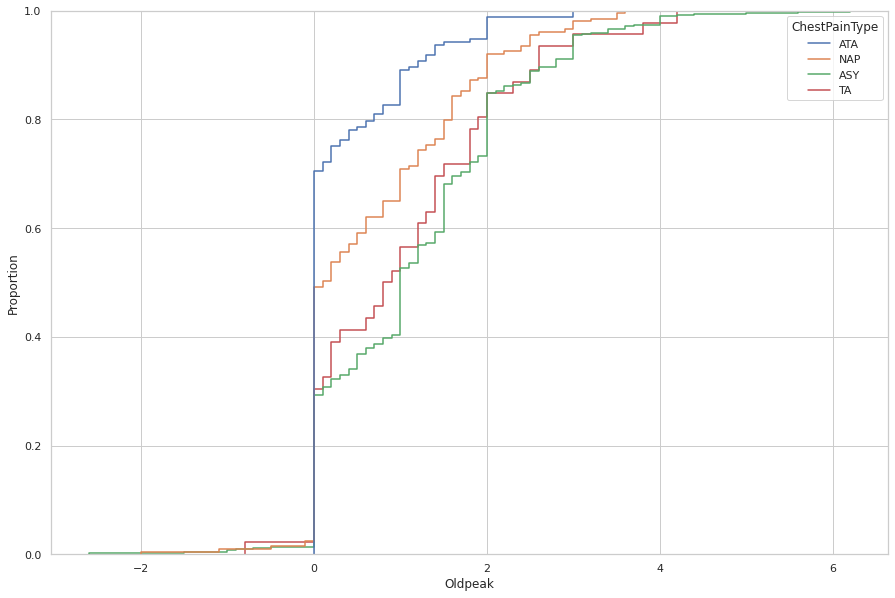

In [ ]:
plt.figure(figsize=(15,10))
sns.ecdfplot(data=df, x="Oldpeak", hue= "ChestPainType")
plt.plot()

[]

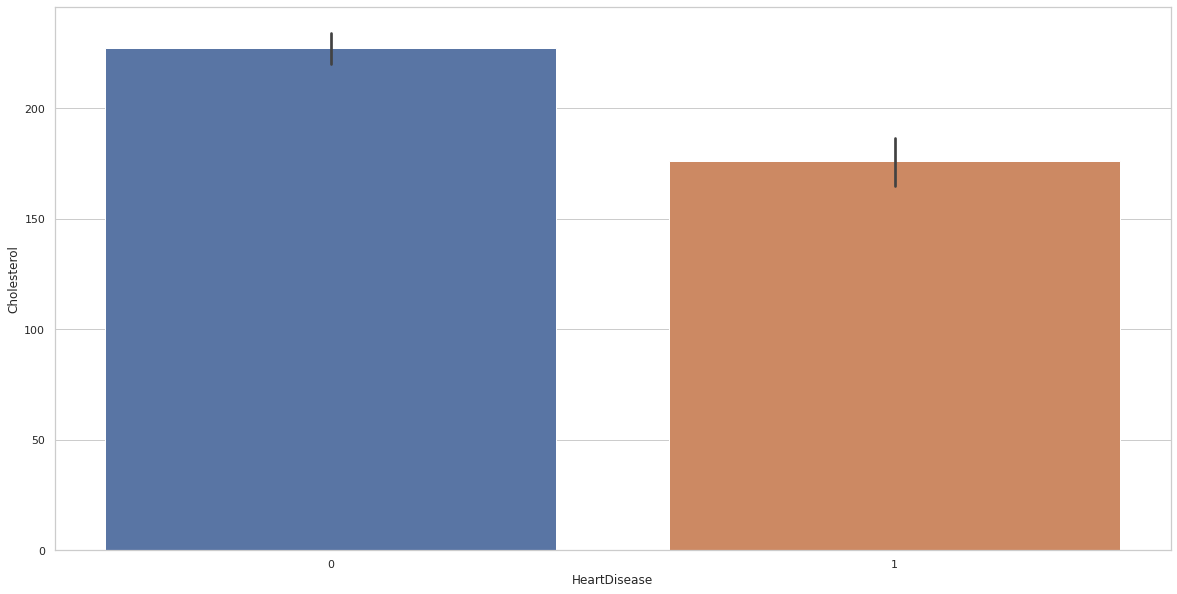

In [ ]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="HeartDisease", y="Cholesterol", data=df)
plt.plot()

[]

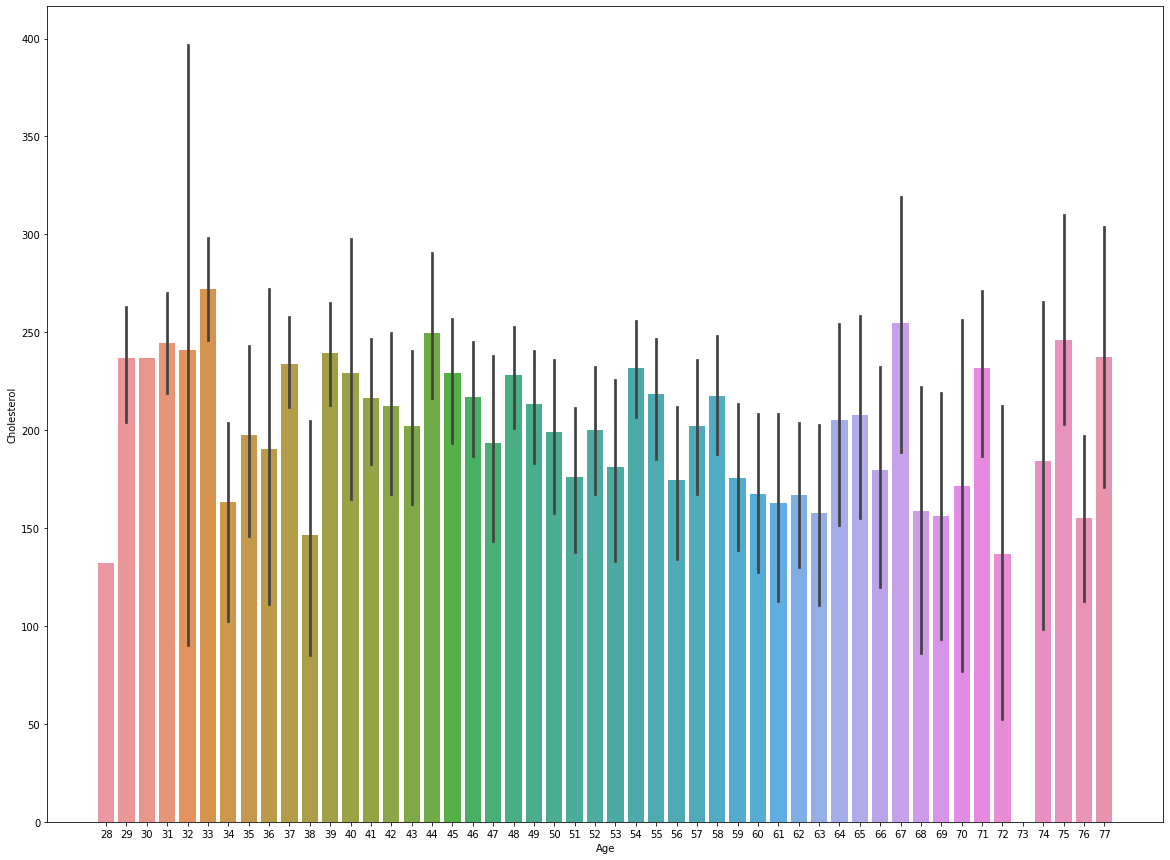

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x=df['Age'],y= df['Cholesterol'],data= df)
plt.plot()

[]

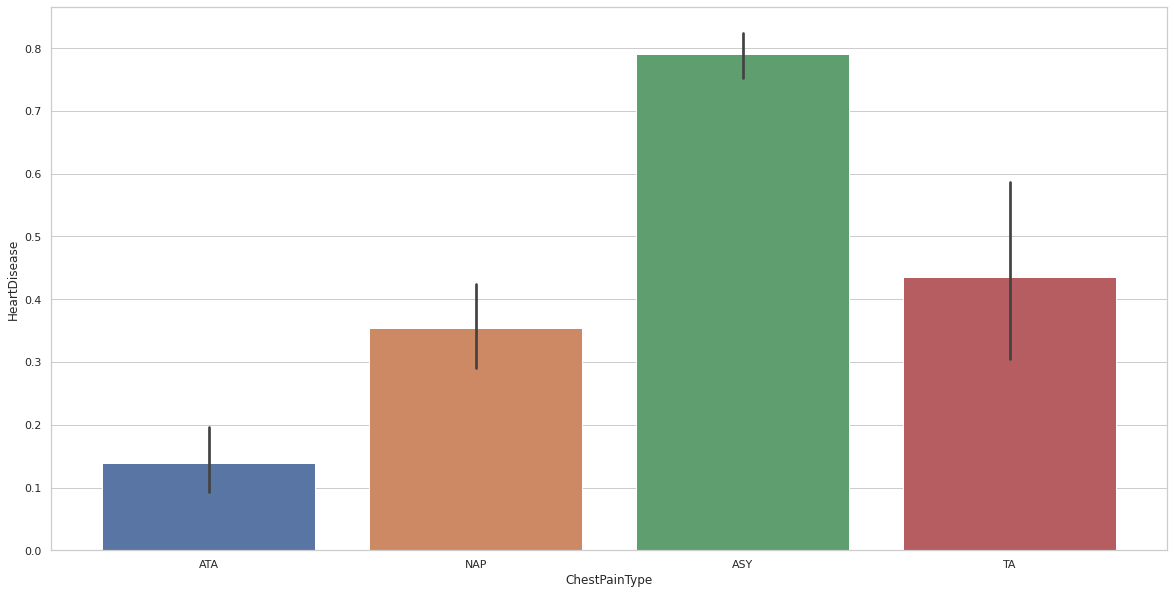

In [ ]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="ChestPainType", y="HeartDisease", data=df)
plt.plot()

In [ ]:
plt.figure(figsize=(15,10))
corr = df.corr()
plt.plot(corr)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
one_hot_encoded_data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

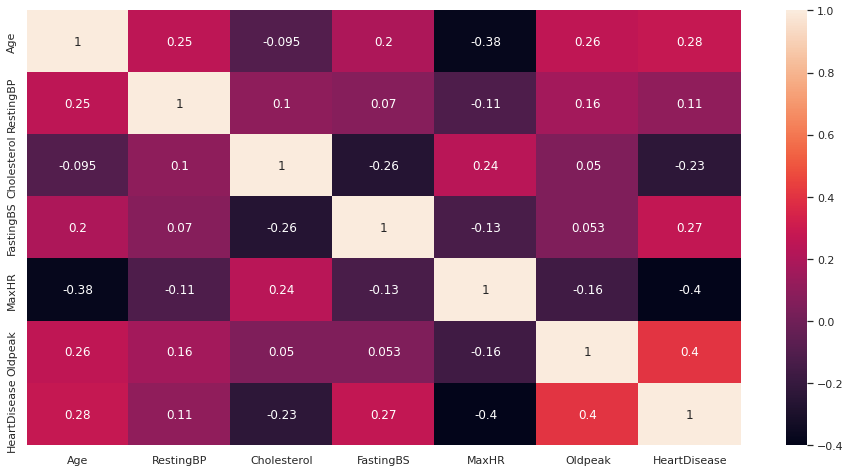

In [ ]:
plt.figure(1 , figsize = (16 , 8))
cor = sns.heatmap(df.corr(), annot = True)

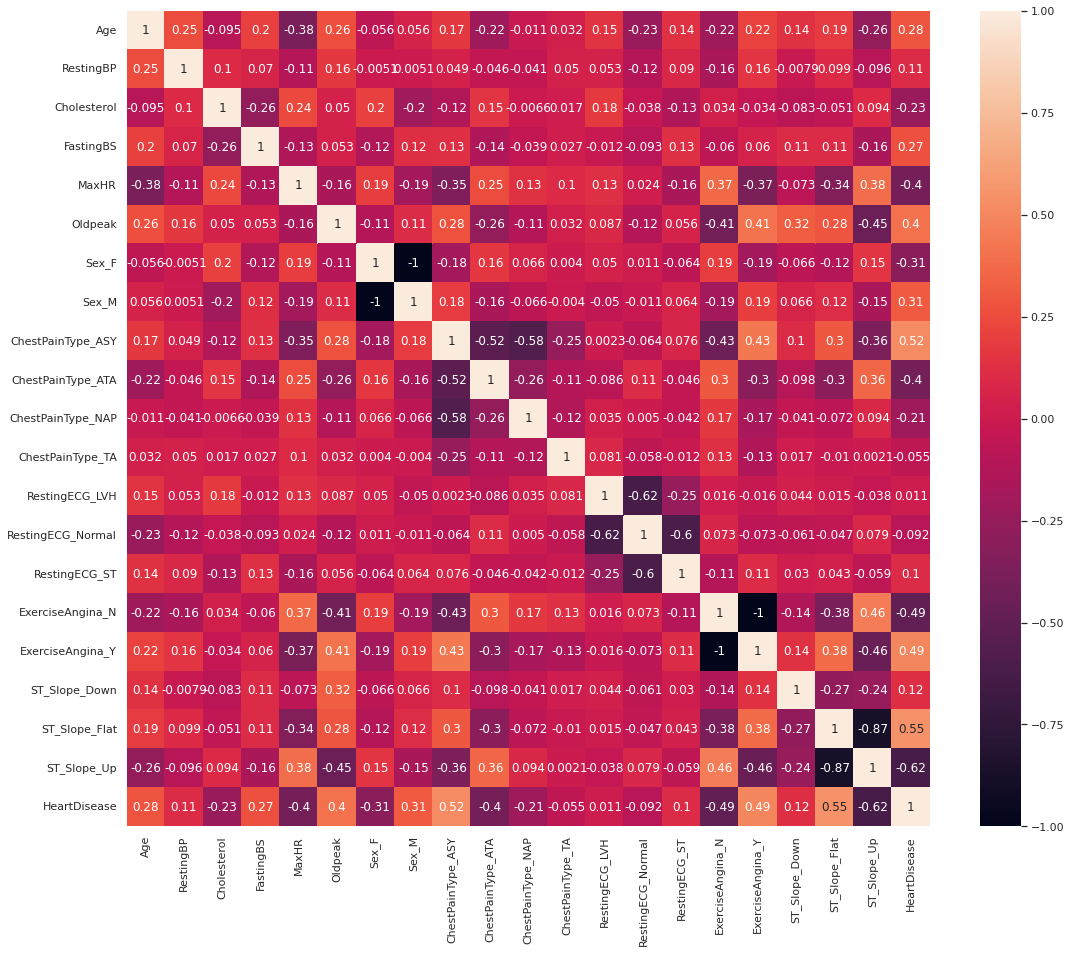

In [ ]:
plt.figure(1 , figsize = (18 , 15))
cor = sns.heatmap(dfonehot.corr(), annot = True)

In [ ]:
import xgboost

In [ ]:
type(one_hot_encoded_data)

pandas.core.frame.DataFrame

In [ ]:
#column_names = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','Sex_F', 'Sex_M', 'ChestPainType_ASY','ChestPainType_ATA',
'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST','ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']

In [ ]:
one_hot_encoded_data.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
dfonehot = one_hot_encoded_data.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,6]]

In [ ]:
dfonehot.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


In [ ]:
dfonehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   Sex_F              918 non-null    uint8  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ASY  918 non-null    uint8  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_LVH     918 non-null    uint8  
 13  RestingECG_Normal  918 non-null    uint8  
 14  RestingECG_ST      918 non-null    uint8  
 15  ExerciseAngina_N   918 non-null    uint8  
 16  ExerciseAngina_Y   918 non

In [ ]:
x= dfonehot[:]
y= dfonehot['HeartDisease']
x= x.drop('HeartDisease',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.33, random_state=42)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_test))
print(len(y_train))

615
303
303
615


# Model Building (LOgistic Regression)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix

In [ ]:
m_scale= MinMaxScaler()
s_scale = StandardScaler()

**Using MINMAXSCALER**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression(C= 10, solver = "lbfgs")

In [ ]:
x_train_mscaled = m_scale.fit_transform(x_train)
x_test_mscaled = m_scale.transform (x_test)

In [ ]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
logistic_model = lg.fit(x_train_mscaled,y_train)

In [ ]:
ypred = logistic_model.predict(x_test_mscaled)

In [ ]:
y_test

668    0
30     1
377    1
535    1
807    0
      ..
164    0
28     0
514    1
193    0
321    1
Name: HeartDisease, Length: 303, dtype: int64

In [ ]:
conf_matix = confusion_matrix(y_test, ypred)
print(conf_matix)

[[112  11]
 [ 26 154]]


[[112  11]
 [ 26 154]]

In [ ]:
acc_score  = print('accuracy score is:', accuracy_score(y_test, ypred))

accuracy score is: 0.8778877887788779


In [ ]:
precisionscore = print('precision score is:', precision_score(y_test, ypred))

precision score is: 0.9333333333333333


**Using Standard scaler**

In [ ]:
xtrain_s_scaled = s_scale.fit_transform(x_train)
xtest_s_scaled = s_scale.transform(x_test)

In [ ]:
logisticmodel_stan = lg.fit(xtrain_s_scaled, y_train)

In [ ]:
ypred_stand = logisticmodel_stan.predict(xtest_s_scaled)

In [ ]:
from sklearn.metrics import precision_score,f1_score

In [ ]:
print('confusion matrix with standard scale data: \n',  confusion_matrix(ypred_stand, y_test))
print('accuracy score with standard scaled data: \n', accuracy_score (ypred_stand, y_test))
print('precision score with standard scaled data: \n', precision_score(ypred_stand, y_test))

confusion matrix with standard scale data: 
 [[112  26]
 [ 11 154]]
accuracy score with standard scaled data: 
 0.8778877887788779
precision score with standard scaled data: 
 0.8555555555555555


# XGBOOST model

In [ ]:
from xgboost.sklearn import XGBClassifier
xgbmodel = XGBClassifier(learning_rate=0.1)

In [ ]:
xgbmodel.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

**Using MINMAX scaled data**

In [ ]:
xgb_mscaled = xgbmodel.fit(x_train_mscaled,y_train)
pred_xgb_mscaled= xgb_mscaled.predict(x_test_mscaled)

In [ ]:
print(' The confusion matrix for XGBClassifier model with standard scale data: \n',  confusion_matrix(pred_xgb_mscaled, y_test))
print('The accuracy score for XGBClassifier model  with standard scaled data: \n', accuracy_score (pred_xgb_mscaled, y_test))
print('The precision score for XGBClassifier model with standard scaled data: \n', precision_score(pred_xgb_mscaled, y_test))

 The confusion matrix for XGBClassifier model with standard scale data: 
 [[110  32]
 [ 13 148]]
The accuracy score for XGBClassifier model  with standard scaled data: 
 0.8514851485148515
The precision score for XGBClassifier model with standard scaled data: 
 0.8222222222222222


**Using Standard scaled data**

In [ ]:
xgb_sscaled = xgbmodel.fit(xtrain_s_scaled,y_train)
pred_xgb_sscaled = xgb_mscaled.predict(xtest_s_scaled)

In [ ]:
print('the accuracy score for XGBClassifier model with minmax scaled data: \n', accuracy_score(pred_xgb_sscaled, y_test))
print('The Confusion matrix for XGBClassifier model with minmax scaled data: \n', confusion_matrix(pred_xgb_sscaled, y_test))
print('The F1 score for XGBClassifier model with minmax scaled data: \n', f1_score(pred_xgb_sscaled,y_test))
print('The precision score for XGBClassifier model with minmax scaled data: \n', precision_score(pred_xgb_sscaled, y_test))

the accuracy score for XGBClassifier model with minmax scaled data: 
 0.8514851485148515
The Confusion matrix for XGBClassifier model with minmax scaled data: 
 [[110  32]
 [ 13 148]]
The F1 score for XGBClassifier model with minmax scaled data: 
 0.8680351906158357
The precision score for XGBClassifier model with minmax scaled data: 
 0.8222222222222222


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knmodel  = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knmodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.772320 using {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
0.664489 (0.043119) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.664489 (0.043119) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.676863 (0.043793) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.681585 (0.045295) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.706231 (0.046643) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.710240 (0.044720) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.708413 (0.041227) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.712418 (0.040805) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.711319 (0.042325) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.715691 (0.040637) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.709866

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def hello_world():
    return "<p>Hello, World!</p>"
app.run()

In [ ]:
pip install streamlit

In [ ]:
import streamlit as st
st.title("Spam Detection System")
def spamdetection():
    user = st.text_area("Enter any Message or Email: ")
    if len(user) < 1:
        st.write("  ")
    else:
        sample = user
        data = cv.transform([sample]).toarray()
        a = clf.predict(data)
        st.title(a)
spamdetection()

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-01-05 12:23:46--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  60.5MB/s    in 0.2s    

2022-01-05 12:23:46 (60.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8502 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://f6be-35-196-248-43.ngrok.io


In [ ]:
!streamlit run /content/drive/MyDrive/Colab Notebooks/heardisease/home.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Streamlit requires raw Python (.py) files, but the provided file has no extension.
For more information, please see https://docs.streamlit.io


In [ ]:
#sample = eval(input("Enter the CPI for July 2015: "))
#data = m_scale.transform (a1)
#dataa = data.toarray()
#print(logistic_model.predict(dataa))

In [ ]:
#a = [40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1]
#a1= a.toarray()

# lazy predict

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

 14%|█▍        | 4/29 [00:00<00:02, 10.13it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|████████▉ | 26/29 [00:01<00:00, 19.92it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:01<00:00, 16.62it/s]

                               Accuracy  ...  Time Taken
Model                                    ...            
LogisticRegression                 0.88  ...        0.03
SVC                                0.88  ...        0.05
GaussianNB                         0.87  ...        0.02
AdaBoostClassifier                 0.87  ...        0.14
RandomForestClassifier             0.87  ...        0.22
LinearDiscriminantAnalysis         0.87  ...        0.03
RidgeClassifierCV                  0.87  ...        0.03
RidgeClassifier                    0.87  ...        0.02
NuSVC                              0.88  ...        0.06
LinearSVC                          0.86  ...        0.07
CalibratedClassifierCV             0.86  ...        0.20
LGBMClassifier                     0.87  ...        0.08
NearestCentroid                    0.85  ...        0.03
ExtraTreesClassifier               0.86  ...        0.17
KNeighborsClassifier               0.85  ...        0.03
PassiveAggressiveClassifier    

**minmax scaled data**

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf_mscaled = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models_mscaled, predictions_mscaled = clf_mscaled.fit(x_train_mscaled, x_test_mscaled, y_train, y_test)
print(models_mscaled)

 14%|█▍        | 4/29 [00:00<00:02, 11.11it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|████████▉ | 26/29 [00:01<00:00, 20.45it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:01<00:00, 17.52it/s]

                               Accuracy  ...  Time Taken
Model                                    ...            
LogisticRegression                 0.88  ...        0.02
SVC                                0.88  ...        0.05
GaussianNB                         0.87  ...        0.02
AdaBoostClassifier                 0.87  ...        0.12
RandomForestClassifier             0.87  ...        0.21
LinearDiscriminantAnalysis         0.87  ...        0.04
RidgeClassifierCV                  0.87  ...        0.03
RidgeClassifier                    0.87  ...        0.02
NuSVC                              0.88  ...        0.05
LinearSVC                          0.86  ...        0.11
CalibratedClassifierCV             0.86  ...        0.18
LGBMClassifier                     0.87  ...        0.08
NearestCentroid                    0.85  ...        0.02
ExtraTreesClassifier               0.86  ...        0.18
KNeighborsClassifier               0.85  ...        0.03
PassiveAggressiveClassifier    

In [ ]:
print(predictions_mscaled)

                               Accuracy  ...  Time Taken
Model                                    ...            
LogisticRegression                 0.88  ...        0.02
SVC                                0.88  ...        0.05
GaussianNB                         0.87  ...        0.02
AdaBoostClassifier                 0.87  ...        0.12
RandomForestClassifier             0.87  ...        0.21
LinearDiscriminantAnalysis         0.87  ...        0.04
RidgeClassifierCV                  0.87  ...        0.03
RidgeClassifier                    0.87  ...        0.02
NuSVC                              0.88  ...        0.05
LinearSVC                          0.86  ...        0.11
CalibratedClassifierCV             0.86  ...        0.18
LGBMClassifier                     0.87  ...        0.08
NearestCentroid                    0.85  ...        0.02
ExtraTreesClassifier               0.86  ...        0.18
KNeighborsClassifier               0.85  ...        0.03
PassiveAggressiveClassifier    